In [21]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
import datetime
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score,f1_score, make_scorer, classification_report
import scikitplot as skplt
from scipy.sparse import hstack , csr_matrix







In [5]:
with open('finaldata.pkl', 'rb') as f: 
    final = pickle.load(f)



In [6]:
final.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read nice rhythm well good re...
4,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetri month year goe month cute littl po...


In [7]:
fsubset = final.sample(n = 45000)

In [8]:
del final

In [9]:
fsubset = fsubset.sort_values(by = ["Time"])

In [10]:
fsubset.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
330,346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
241,1146,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,1,961718400,Great Product,This was a really good idea and the final prod...,realli good idea final product outstand use de...
868,138017,149789,B00004S1C6,A1KXONFPU2XQ5K,Stephanie Manley,26,28,1,965779200,A must have!,"These are easy to use, they do not make a mess...",easi use make mess offer vibrant color taint d...
1063,443662,479723,B00005U2FA,A3TO9GEQEGKFDC,"N. Smith ""emerald999""",35,35,1,1020211200,I love this thing,The wine saver is great in so many ways. Obvio...,wine saver great mani way obvious wonder abl o...
299,346105,374411,B00004CI84,A1CAA94EOP0J2S,Travis J Smith,4,4,1,1036022400,Great Comedy,Beetlejuice is the story of ghosts (Alec Baldw...,beetlejuic stori ghost alec baldwin geena davi...


In [8]:
X = np.array(fsubset['CleanedText'])
X.shape
y = np.array(fsubset['Score'])
y.shape


(45000,)

In [9]:
X_1, X_test_train, y_train, y_test =model_selection.train_test_split(X, y,test_size = 0.3,random_state = 42, shuffle = False)


In [10]:
print(X_1.shape)
print(X_test_train.shape)
print(y_train.shape)
print(y_test.shape)


(31500,)
(13500,)
(31500,)
(13500,)


#### Finding optimal K and plotting a graph for accuracy

In [11]:
def knn_cross (X_train,y_train):
    
    # creating odd list of K for KNN
    myList = list(range(1,30))
    neighbors = list(filter(lambda x: x % 2 != 0, myList))
    acc ={ }

    # perform 10-fold cross validation
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
        acc[k] = scores.mean()

    # determining best k
    optimal_k = max(acc, key=acc.get)
    
    return(optimal_k,acc)
    

In [12]:
def accuracyplot (acc):
    plt.plot(acc.keys() , acc.values())
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Accuracy')
    plt.show()
    print("Accuracy at",optimal_k,"is", acc[optimal_k]*100)

In [16]:
def hyperparameters_test_predictions(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    #skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [14]:
def prediction (X_train , y_train, X_test ,y_test ,optimal_k):
    # ============================== KNN with k = optimal_k ===============================================
    # instantiate learning model k = optimal_k
    knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

    # fitting the model
    knn_optimal.fit(X_train, y_train)

    # predict the response
    pred = knn_optimal.predict(X_test)

    # evaluate accuracy
    accuracy = accuracy_score(y_test, pred) * 100
    
    # evaluate confusion matrix
    hyperparameters_test_predictions(y_test,pred)
    print('\nThe accuracy of the knn classifier for k = %d is %f%% is the best accuracy' % (optimal_k, accuracy))

## Bag of Words

In [17]:
count_vec = CountVectorizer()
X_train = count_vec.fit_transform(X_1)
X_test = count_vec.transform(X_test_train)

In [18]:
optimal_k ,acc= knn_cross(X_train , y_train)

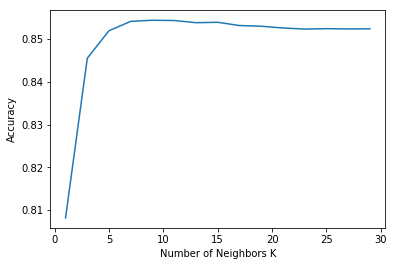

Accuracy at 9 is 85.43810170631986


In [19]:
accuracyplot(acc)

In [20]:
prediction (X_train , y_train, X_test ,y_test ,optimal_k)

              precision    recall  f1-score   support

           0       0.66      0.05      0.09      2341
           1       0.83      0.99      0.91     11159

   micro avg       0.83      0.83      0.83     13500
   macro avg       0.75      0.52      0.50     13500
weighted avg       0.80      0.83      0.76     13500


The accuracy of the knn classifier for k = 9 is 83.059259% is the best accuracy


## Tfidf

In [19]:
# TF-IDF function.
tf_idf_vect = TfidfVectorizer()
X_train = tf_idf_vect.fit_transform(X_1)
X_test = tf_idf_vect.transform(X_test_train)

In [20]:
optimal_k,acc = knn_cross(X_train,y_train)

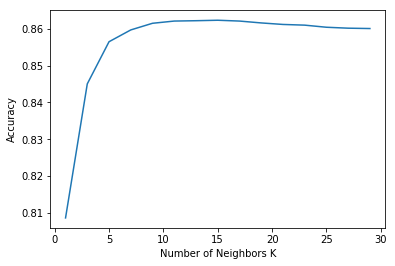

Accuracy at 15 is 86.23493537263144


In [21]:
accuracyplot(acc)

In [22]:
prediction (X_train , y_train, X_test ,y_test ,optimal_k)

              precision    recall  f1-score   support

           0       0.85      0.11      0.19      2379
           1       0.84      1.00      0.91     11121

   micro avg       0.84      0.84      0.84     13500
   macro avg       0.84      0.55      0.55     13500
weighted avg       0.84      0.84      0.78     13500


The accuracy of the knn classifier for k = 15 is 83.962963% is the best accuracy


## Average Word to Vector

In [23]:
i=0
list_of_sentences=[]
for sent in X_1:
    list_of_sentences.append(sent.split())

w2v_model=Word2Vec(list_of_sentences,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)

X_train = []
for sentence in (list_of_sentences): # for each review/sentence
    count =0
    sent_vec = np.zeros(50) # as word vectors are of zero length
    for word in sentence: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            count +=1
    if count != 0:
        sent_vec/=count
    X_train.append(sent_vec)    


In [24]:
X_train = np.array(X_train)

In [25]:
X_train.shape

(31500, 50)

In [26]:
i=0
list_of_sentences=[]
for sent in X_test_train:
    list_of_sentences.append(sent.split())

X_test = []
for sentence in (list_of_sentences): # for each review/sentence
    count =0
    sent_vec = np.zeros(50) # as word vectors are of zero length
    for word in sentence: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            count +=1
    if count != 0:
        sent_vec/=count
    X_test.append(sent_vec)    


In [27]:
X_test = np.array(X_test)

In [28]:
X_test.shape

(13500, 50)

In [29]:
optimal_k,acc = knn_cross(X_train, y_train)

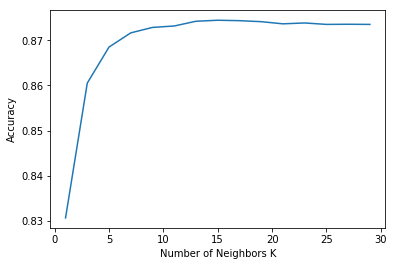

Accuracy at 15 is 87.44117787263067


In [30]:
accuracyplot(acc)

In [31]:
prediction (X_train , y_train, X_test ,y_test ,optimal_k)

              precision    recall  f1-score   support

           0       0.75      0.27      0.40      2379
           1       0.86      0.98      0.92     11121

   micro avg       0.86      0.86      0.86     13500
   macro avg       0.81      0.63      0.66     13500
weighted avg       0.84      0.86      0.83     13500


The accuracy of the knn classifier for k = 15 is 85.577778% is the best accuracy


## Tf-Idf and Average word to vector

In [32]:
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(X_1)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))
i=0
list_of_sentences=[]
for sent in X_1:
    list_of_sentences.append(sent.split())


In [33]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf
X_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sentences: # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            #tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    X_train.append(sent_vec)
    row += 1

In [34]:
X_train = np.array(X_train)

In [35]:
X_train.shape

(31500, 50)

In [36]:
tf_idf_matrix = model.transform(X_test_train)
# we are converting a dictionary with word as a key, and the idf as a value
i=0
list_of_sentences=[]
for sent in X_test_train:
    list_of_sentences.append(sent.split())


In [37]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf
X_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sentences: # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            #tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    X_test.append(sent_vec)
    row += 1

In [38]:
X_test = np.array(X_test)

In [39]:
X_test.shape

(13500, 50)

In [40]:
optimal_k,acc = knn_cross(X_train, y_train)

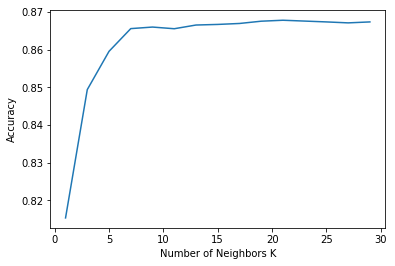

Accuracy at 21 is 86.78408836322382


In [41]:
accuracyplot(acc)

In [42]:
prediction (X_train , y_train, X_test ,y_test ,optimal_k)

              precision    recall  f1-score   support

           0       0.77      0.20      0.32      2379
           1       0.85      0.99      0.91     11121

   micro avg       0.85      0.85      0.85     13500
   macro avg       0.81      0.59      0.62     13500
weighted avg       0.84      0.85      0.81     13500


The accuracy of the knn classifier for k = 21 is 84.822222% is the best accuracy
